In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
 
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [3]:
data=pd.DataFrame()
with open('all_data_3462.csv','r') as file:
    for index,line in enumerate(file):
        if 0<index<=10000:
            data.loc[index,'smiles']=line.split()[0]
            #data.loc[index,'id']=line.split()[1]

data.head(10)

,smiles
1,OCCOc1ccc(c(c1)C)c1cccc(c1)CNc1ccc(c(c1)F)OCC(...
2,CC#CC(c1ccc(cc1)OCc1ccc(cc1)c1cccc(c1)OC)CC(=O)O
3,CC#C[C@H](c1ccc(cc1)OCc1ccc(cc1)c1cccc(c1)OC)C...
4,CC#C[C@@H](c1ccc(cc1)OCc1ccc(cc1)c1cccc(c1)OC)...
5,OCc1cc(CCC(=O)O)ccc1OCc1ccccc1SC(F)(F)F
6,OC(=O)CSc1nnc(s1)SCc1cccc2c1cccc2
7,OC(=O)CS(=O)(=O)c1ccc(cc1)OCc1sc(nc1C)c1ccccc1
8,OC(=O)CS(=O)(=O)c1ccc(cc1)OCc1sc(nc1C)c1ccc(cc1)F
9,OC(=O)CS(=O)(=O)c1ccc(cc1)OCc1cccc(c1)c1c(C)cc...
10,OC(=O)COc1ccc(cc1F)OCc1cccc(c1)c1c(C)cc(cc1C)O...


In [4]:
for i in data.index:
    mol=Chem.MolFromSmiles(data.loc[i,'smiles'])
    data.loc[i,'MolWt']=Descriptors.ExactMolWt (mol)
    data.loc[i,'TPSA']=Chem.rdMolDescriptors.CalcTPSA(mol) #Topological Polar Surface Area
    data.loc[i,'nRotB']=Descriptors.NumRotatableBonds (mol) #Number of rotable bonds
    data.loc[i,'HBD']=Descriptors.NumHDonors(mol) #Number of H bond donors
    data.loc[i,'HBA']=Descriptors.NumHAcceptors(mol) #Number of H bond acceptors
    data.loc[i,'LogP']=Descriptors.MolLogP(mol) #LogP

data.head(10)

,smiles,MolWt,TPSA,nRotB,HBD,HBA,LogP
1,OCCOc1ccc(c(c1)C)c1cccc(c1)CNc1ccc(c(c1)F)OCC(...,425.163851,88.02,10.0,3.0,5.0,4.24772
2,CC#CC(c1ccc(cc1)OCc1ccc(cc1)c1cccc(c1)OC)CC(=O)O,400.167459,55.76,8.0,1.0,3.0,5.52280
3,CC#C[C@H](c1ccc(cc1)OCc1ccc(cc1)c1cccc(c1)OC)C...,400.167459,55.76,8.0,1.0,3.0,5.52280
4,CC#C[C@@H](c1ccc(cc1)OCc1ccc(cc1)c1cccc(c1)OC)...,400.167459,55.76,8.0,1.0,3.0,5.52280
5,OCc1cc(CCC(=O)O)ccc1OCc1ccccc1SC(F)(F)F,386.079965,66.76,8.0,2.0,4.0,4.38700
6,OC(=O)CSc1nnc(s1)SCc1cccc2c1cccc2,348.006091,63.08,6.0,1.0,6.0,4.16030
7,OC(=O)CS(=O)(=O)c1ccc(cc1)OCc1sc(nc1C)c1ccccc1,403.054815,93.56,7.0,1.0,6.0,3.55582
8,OC(=O)CS(=O)(=O)c1ccc(cc1)OCc1sc(nc1C)c1ccc(cc1)F,421.045393,93.56,7.0,1.0,6.0,3.69492
9,OC(=O)CS(=O)(=O)c1ccc(cc1)OCc1cccc(c1)c1c(C)cc...,410.118795,80.67,7.0,1.0,4.0,4.40774
10,OC(=O)COc1ccc(cc1F)OCc1cccc(c1)c1c(C)cc(cc1C)O...,516.161802,99.13,12.0,1.0,6.0,4.96544


In [5]:
descriptors = data.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values

In [6]:
descriptors_std = StandardScaler().fit_transform(descriptors)

In [7]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = data.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.tail(10)


,PC1,PC2,PC3,PC4,PC5,PC6
3893,3.184883,-0.627941,-0.730131,-0.548581,-0.115430,-0.149917
3894,-1.637695,0.672958,-0.606632,-0.327702,0.101005,-0.169095
3895,-1.637695,0.672958,-0.606632,-0.327702,0.101005,-0.169095
3896,-0.140154,-2.033023,0.393711,0.664124,0.084102,-0.173189
3897,-0.648492,1.219064,1.035280,-0.644149,-0.340007,0.215130
3898,0.647447,-0.875055,-0.319031,-0.947622,-0.629392,0.816158
3899,0.647447,-0.875055,-0.319031,-0.947622,-0.629392,0.816158
3900,0.208787,-1.557390,0.107983,-0.939303,-0.677846,0.721049
3901,0.278205,-1.884869,-1.822868,-1.089674,-0.837397,0.857760
3902,-0.160455,-2.567204,-1.395854,-1.081355,-0.885851,0.762651


In [8]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[0.46482533 0.28437035 0.1412092  0.0804682  0.01629426 0.01283266]
0.9999999999999999


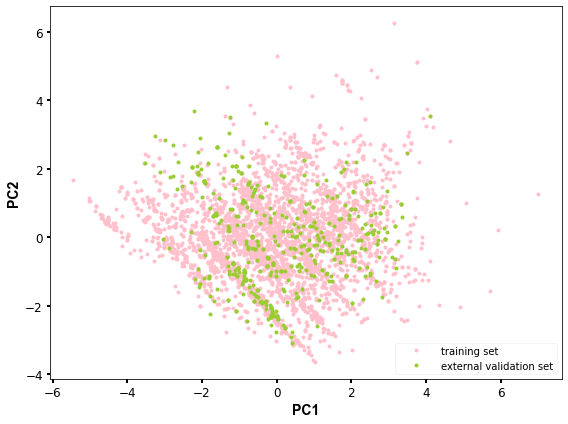

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
 
ax.plot(descriptors_pca.iloc[:3462,0],descriptors_pca.iloc[:3462,1],'o',color='#FFC0CB',markersize=3,label='training set')
ax.plot(descriptors_pca.iloc[3463:,0],descriptors_pca.iloc[3463:,1],'o',color='#9ACD32',markersize=3,label='external validation set')
ax.legend(loc='lower right',fontsize=10, frameon=True, fancybox=True, framealpha=0.2, borderpad=0.3,ncol=1, markerfirst=True, markerscale=1, numpoints=1, handlelength=3.5)

ax.set_xlabel ('PC1',fontsize=14,fontweight='bold',fontfamily='Arial')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold',fontfamily='Arial')
 
plt.tick_params ('both',width=2,labelsize=12)
plt.rcParams['figure.figsize'] = (8.0, 8.0)


plt.tight_layout()
plt.savefig("1.tiff",dpi=600)
plt.show()
plt.close()